# Machine Learning Lab 
## Assessment 2

### Jeevan Yohan Varghese - 20BCE0083

Slot : L43+L44
<br>
<div style="background-color:#0d47a1;padding:6px;color:white"></div>

<div style="background-color:#bbdefb;padding:12px;">
    <h3> 1. Find S Algorithm</h3>
</div>           

In [139]:
import csv
num_attributes = 6
a = [] 
print("\n Data Set \n")
file = 'ws.csv'
with open(file, 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        a.append (row)
        print(row)
        
type(reader)


 Data Set 

['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes']
['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes']
['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No']
['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']


_csv.reader

In [140]:
print("\n The initial value of hypothesis: ")
hypothesis = ['0'] * num_attributes
print(hypothesis)

for j in range(0,num_attributes):
    hypothesis[j] = a[0][j] 
    
hypothesis


 The initial value of hypothesis: 
['0', '0', '0', '0', '0', '0']


['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']

In [141]:
print("\n Find S: Finding most specific Hypothesis\n") 

for i in range(0,len(a)):
    if a[i][num_attributes]=='Yes':
        for j in range(0,num_attributes):
            print(a[i][j], end=' ')
            if a[i][j]!=hypothesis[j]:
                hypothesis[j]='?'
            else :
                hypothesis[j]= a[i][j] 
    print("\n\nFor Training No:{} the hypothesis is ".format(i), hypothesis)

print("\n The Most Specific Hypothesis :\n")
print(hypothesis)


 Find S: Finding most specific Hypothesis

Sunny Warm Normal Strong Warm Same 

For Training No:0 the hypothesis is  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Sunny Warm High Strong Warm Same 

For Training No:1 the hypothesis is  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']


For Training No:2 the hypothesis is  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Sunny Warm High Strong Cool Change 

For Training No:3 the hypothesis is  ['Sunny', 'Warm', '?', 'Strong', '?', '?']

 The Most Specific Hypothesis :

['Sunny', 'Warm', '?', 'Strong', '?', '?']


<div style="background-color:#bbdefb;padding:12px;">
    <h3> 2. Candidate Elimination</h3>
</div>           

In [142]:
import random
import csv
def g_0(n):
    return ("?",)*n

def s_0(n):
    return ('0',)*n

In [143]:
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == "?" or (x != "0" and (x == y or y == "0"))
        more_general_parts.append(mg)
    return all(more_general_parts)

l1 = [1, 2, 3]
l2 = [3, 4, 5]

list(zip(l1, l2))

[(1, 3), (2, 4), (3, 5)]

In [144]:
def fulfills(example, hypothesis):
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not fulfills(x[i:i+1], h[i:i+1]):
            h_new[i] = '?' if h[i] != '0' else x[i]
    return [tuple(h_new)]

In [145]:
min_generalizations(h=('0', '0'  , 'sunny'), 
                    x=('rainy', 'windy', 'cloudy'))

[('rainy', 'windy', '?')]

In [146]:
def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == "?":
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != "0":
            h_new = h[:i] + ('0',) + h[i+1:]
            results.append(h_new)
    return results

In [147]:
min_specializations(h=('?', 'x',), 
                    domains=[['a', 'b', 'c'], ['x', 'y']], 
                    x=('b', 'x'))

[('a', 'x'), ('c', 'x'), ('?', '0')]

In [148]:
with open('dataset.csv')  as csvFile:
        examples = [tuple(line) for line in csv.reader(csvFile)]
examples

[('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'),
 ('Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'),
 ('Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'),
 ('Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes')]

In [149]:
def get_domains(examples):
    d = [set() for i in examples[0]]
    for x in examples:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]

get_domains(examples)

[['Rainy', 'Sunny'],
 ['Cold', 'Warm'],
 ['High', 'Normal'],
 ['Strong'],
 ['Cool', 'Warm'],
 ['Change', 'Same'],
 ['No', 'Yes']]

In [150]:
def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]
    
    G = set([g_0(len(domains))])
    S = set([s_0(len(domains))])
    i=0
    print("\n G[{0}]:".format(i),G)
    print("\n S[{0}]:".format(i),S)
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]  
        if cx=='Yes': 
            G = {g for g in G if fulfills(x, g)}
            S = generalize_S(x, G, S)
        else: 
            S = {s for s in S if not fulfills(x, s)}
            G = specialize_G(x, domains, G, S)
        print("\n G[{0}]:".format(i),G)
        print("\n S[{0}]:".format(i),S)
    return

In [151]:
def generalize_S(x, G, S):
    S_prev = list(S)
    for s in S_prev:
        if s not in S:
            continue
        if not fulfills(x, s):
            S.remove(s)
            Splus = min_generalizations(s, x)
            
            S.update([h for h in Splus if any([more_general(g,h) 
                                               for g in G])])
            
            S.difference_update([h for h in S if 
                                 any([more_general(h, h1) 
                                      for h1 in S if h != h1])])
    return S

In [152]:
def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if fulfills(x, g):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            
            G.difference_update([h for h in G if 
                                 any([more_general(g1, h) 
                                      for g1 in G if h != g1])])
    return G

In [153]:
candidate_elimination(examples)


 G[0]: {('?', '?', '?', '?', '?', '?')}

 S[0]: {('0', '0', '0', '0', '0', '0')}

 G[1]: {('?', '?', '?', '?', '?', '?')}

 S[1]: {('Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same')}

 G[2]: {('?', '?', '?', '?', '?', '?')}

 S[2]: {('Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same')}

 G[3]: {('?', 'Warm', '?', '?', '?', '?'), ('?', '?', '?', '?', '?', 'Same'), ('Sunny', '?', '?', '?', '?', '?')}

 S[3]: {('Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same')}

 G[4]: {('?', 'Warm', '?', '?', '?', '?'), ('Sunny', '?', '?', '?', '?', '?')}

 S[4]: {('Sunny', 'Warm', '?', 'Strong', '?', '?')}


<div style="background-color:#bbdefb;padding:12px;">
    <h3> 3. Linear Regression</h3>
</div>           

Estimated coefficients:
b_0 = 128.1764705882353     
b_1 = -0.18562091503267975


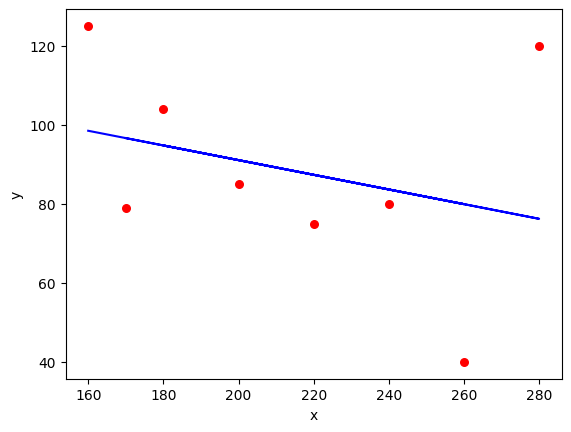

In [154]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    
    n = np.size(x)

    
    m_x = np.mean(x)
    m_y = np.mean(y)


    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    
    plt.scatter(x, y, color = "r",
            marker = "o", s = 30)

    
    y_pred = b[0] + b[1]*x

    
    plt.plot(x, y_pred, color = "b")

    
    plt.xlabel('x')
    plt.ylabel('y')

    
    plt.show()



x = np.array([160, 280, 180, 200, 260, 240, 220, 170])
y = np.array([125, 120, 104, 85, 40, 80, 75, 79])


b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {} \
    \nb_1 = {}".format(b[0], b[1]))


plot_regression_line(x, y, b)




<div style="background-color:#bbdefb;padding:12px;">
    <h3> 4. Decision Tree -ID3</h3>
</div>           

In [155]:
import pandas as pd 
import numpy as np 

In [156]:
train_data_m = pd.read_csv("id3.csv") 

train_data_m.head()

Outlook Temperature Humidity WindSpeed Play
0     Sunny         Hot     High      Weak   No
1     Sunny         Hot     High    Strong   No
2  Overcast         Hot     High      Weak  Yes
3     Rainy        Mild     High      Weak  Yes
4     Rainy        Cool   Normal      Weak  Yes

In [157]:
def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0] 
    total_entr = 0
    
    for c in class_list:
        total_class_count = train_data[train_data[label] == c].shape[0]
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) 
        total_entr += total_class_entr 
    
    return total_entr

In [158]:
def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0]
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count 
            entropy_class = - probability_class * np.log2(probability_class)  
        entropy += entropy_class
    return entropy

In [159]:
def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique() 
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value] 
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list) 
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy 
        
    return calc_total_entropy(train_data, label, class_list) - feature_info 

In [160]:
def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label) 
                                            
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain: 
            max_info_gain = feature_info_gain
            max_info_feature = feature
            
    return max_info_feature

In [161]:
def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False) 
    tree = {} 
    
    for feature_value, count in feature_value_count_dict.iteritems():
        feature_value_data = train_data[train_data[feature_name] == feature_value] 
        
        assigned_to_node = False 
        for c in class_list: 
            class_count = feature_value_data[feature_value_data[label] == c].shape[0]

            if class_count == count: 
                tree[feature_value] = c
                train_data = train_data[train_data[feature_name] != feature_value] 
                assigned_to_node = True
        if not assigned_to_node: 
            tree[feature_value] = "?" 
                                      
            
    return tree, train_data

In [162]:
def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0: 
        max_info_feature = find_most_informative_feature(train_data, label, class_list) 
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list) 
        next_root = None
        
        if prev_feature_value != None:
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else: #add to root of the tree
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        
        for node, branch in list(next_root.items()): 
            if branch == "?": 
                feature_value_data = train_data[train_data[max_info_feature] == node] 
                make_tree(next_root, node, feature_value_data, label, class_list) 

In [163]:
def id3(train_data_m, label):
    train_data = train_data_m.copy() 
    tree = {} 
    class_list = train_data[label].unique() 
    make_tree(tree, None, train_data, label, class_list) 
    return tree

In [164]:
tree = id3(train_data_m, 'Play')
tree

{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}},
  'Overcast': 'Yes',
  'Rainy': {'WindSpeed': {'Weak': 'Yes', 'Strong': 'No'}}}}

<div style="background-color:#bbdefb;padding:12px;">
    <h3> 5. Decision Tree - Gini Index</h3>
</div>           

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = 'gini_data.csv'

df = pd.read_csv(data, header=None)

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names
df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [6]:
X = df.drop(['class'], axis=1)

y = df['class']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.head()

buying  maint  doors persons lug_boot safety
48    vhigh  vhigh      3    more      med    low
468    high  vhigh      3       4    small    low
155   vhigh   high      3    more    small   high
1721    low    low  5more    more    small   high
1208    med    low      2    more    small   high

In [11]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

buying  maint  doors  persons  lug_boot  safety
48         1      1      1        1         1       1
468        2      1      1        2         2       1
155        1      2      1        1         2       2
1721       3      3      2        1         2       2
1208       4      3      3        1         2       2

In [12]:
X_test.head()

buying  maint  doors  persons  lug_boot  safety
599        2      2      4        3         1       2
1201       4      3      3        2         1       3
628        2      2      2        3         3       3
1498       3      2      2        2         1       3
1263       4      3      4        1         1       1

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [14]:
y_pred_gini = clf_gini.predict(X_test)

[Text(0.4, 0.875, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

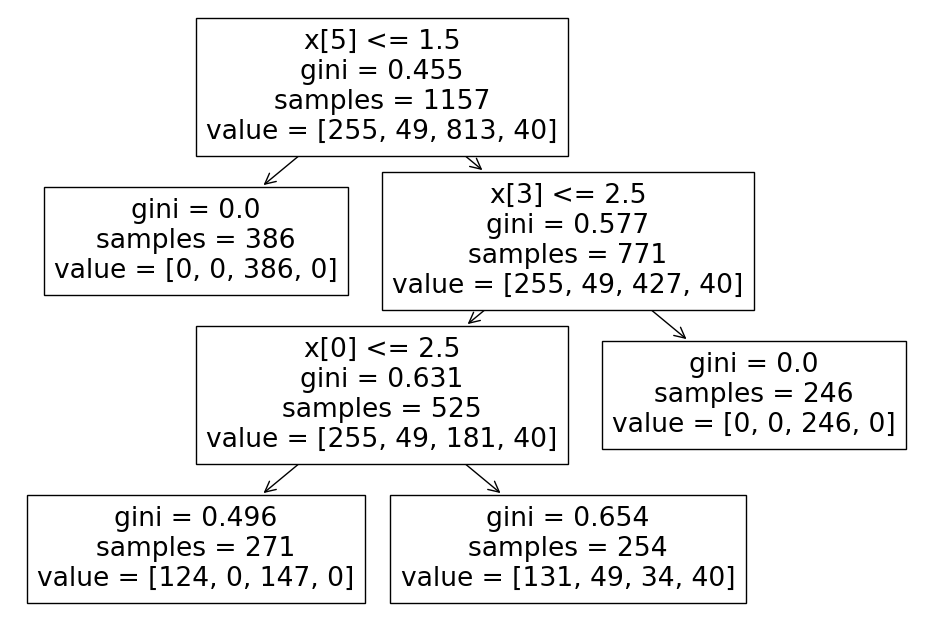

In [15]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 